In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras import regularizers



In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving CarPrice_Assignment.csv to CarPrice_Assignment.csv
User uploaded file "CarPrice_Assignment.csv" with length 26717 bytes


In [3]:
data = pd.read_csv("CarPrice_Assignment.csv")

In [4]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
print(data.shape)

(205, 26)


In [ ]:
data.info()

In [5]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['fueltype'] = labelencoder.fit_transform(data['fueltype'])
data['aspiration'] = labelencoder.fit_transform(data['aspiration'])
data['carbody'] = labelencoder.fit_transform(data['carbody'])
data['drivewheel'] = labelencoder.fit_transform(data['drivewheel'])
data['enginelocation'] = labelencoder.fit_transform(data['enginelocation'])
data['fuelsystem'] = labelencoder.fit_transform(data['enginelocation'])
data['doornumber'] = labelencoder.fit_transform(data['doornumber'])

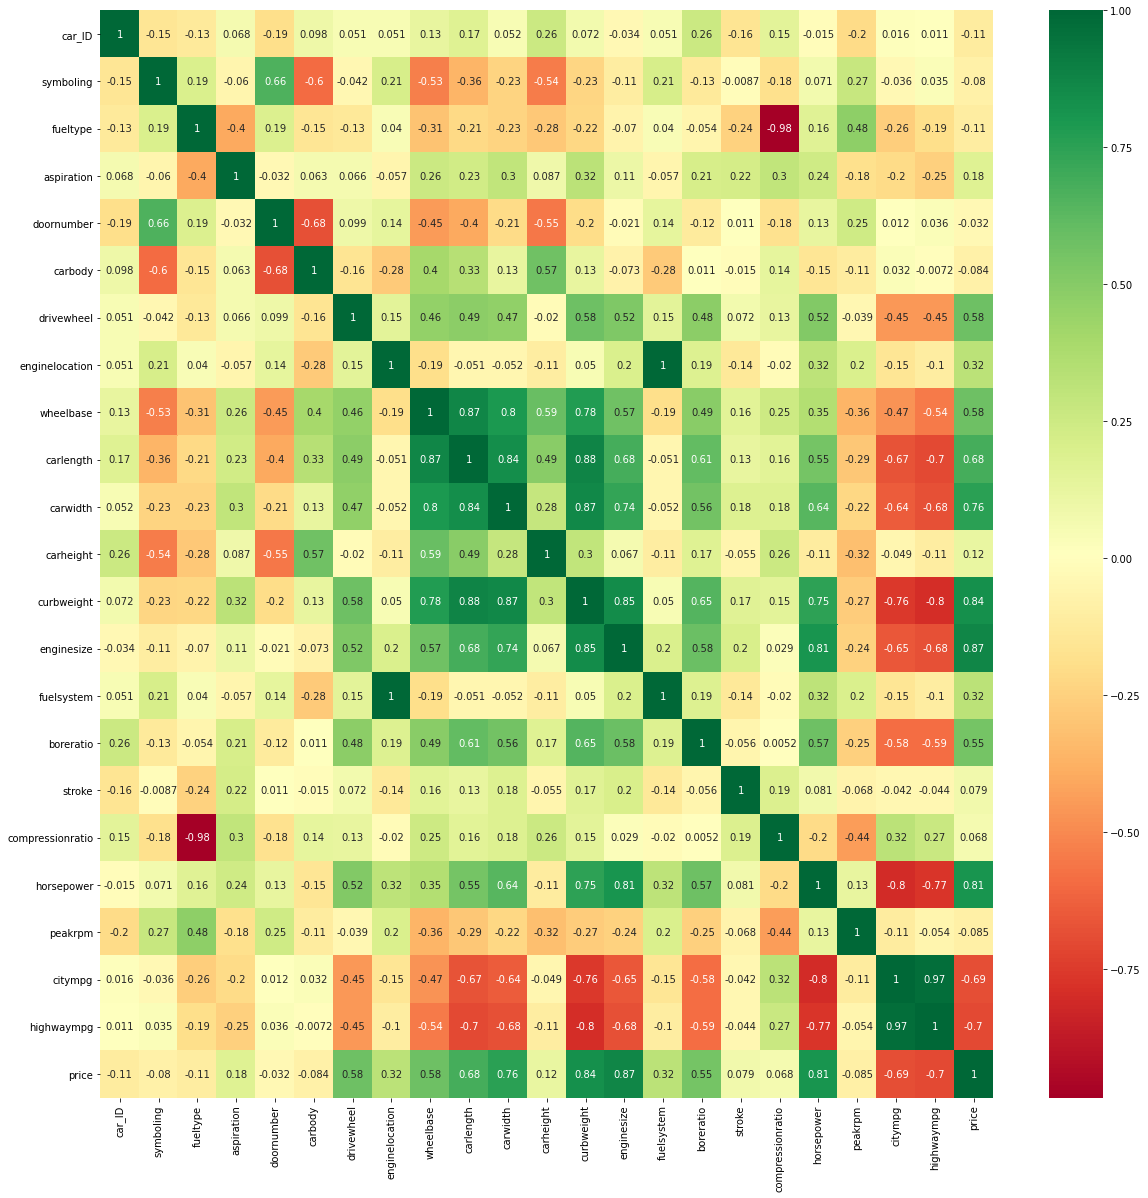

In [6]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [7]:
data1 = data[['horsepower','boreratio','enginesize','curbweight','carwidth','carlength',
              'wheelbase','drivewheel','price','enginelocation']]

In [17]:
x = (data.loc[:, data.columns != 'price'])
y = (data.loc[:, data.columns == 'price'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [18]:
print(x_train)

     car_ID  symboling           CarName  ...  peakrpm  citympg  highwaympg
177     178         -1    toyota mark ii  ...     4200       27          32
75       76          1    mercury cougar  ...     5000       19          24
174     175         -1  toyota celica gt  ...     4500       30          33
31       32          2  honda civic cvcc  ...     6000       31          38
12       13          0            bmw x1  ...     4250       21          28
..      ...        ...               ...  ...      ...      ...         ...
106     107          1    nissan clipper  ...     5200       19          25
14       15          1            bmw z4  ...     4250       20          25
92       93          1      nissan latio  ...     5200       31          37
179     180          3     toyota corona  ...     5200       19          24
102     103          0       nissan fuga  ...     5200       17          22

[143 rows x 25 columns]


In [ ]:
mean = x_train.iloc[: , 0:14].mean(axis=0)
x_train.iloc[: , 0:14] -= mean
std = x_train.iloc[:, 0:14].std(axis=0)
x_train.iloc[: , 0:14] /= std 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


In [ ]:
x_train

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
177,1.235017,-1.494746,NaN,0.301600,-0.480761,-0.884304,-0.730667,-0.638990,-0.118681,0.571301,0.076145,0.234282,0.043705,-0.220606,ohc,four,122,0,3.31,3.54,8.7,92,4200,27,32
75,-0.437588,0.124562,NaN,0.301600,2.065491,1.122925,-0.730667,1.188522,-0.118681,0.620694,0.301819,0.921744,0.406597,0.644684,ohc,four,140,0,3.78,3.12,8.0,175,5000,19,24
174,1.185822,-1.494746,NaN,-3.292465,2.065491,-0.884304,0.430282,-0.638990,-0.118681,0.571301,0.076145,0.234282,0.446919,-0.178490,ohc,four,110,0,3.27,3.35,22.5,73,4500,30,33
31,-1.159104,0.934216,NaN,0.301600,-0.480761,1.122925,-0.730667,-0.638990,-0.118681,-2.030063,-2.422386,-0.957319,-1.206257,-1.443881,ohc,four,92,0,2.91,3.41,9.2,76,6000,31,38
12,-1.470667,-0.685092,NaN,0.301600,-0.480761,1.122925,0.430282,1.188522,-0.118681,0.373729,0.172863,-0.544842,0.204990,0.261812,ohc,six,164,0,3.31,3.19,9.0,121,4250,21,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.070753,0.124562,NaN,0.301600,-0.480761,1.122925,-0.730667,1.188522,-0.118681,0.044442,0.309879,0.875913,-1.649792,1.083072,ohcv,six,181,0,3.43,3.27,9.0,160,5200,19,25
14,-1.437871,0.124562,NaN,0.301600,-0.480761,-0.884304,0.430282,1.188522,-0.118681,0.752408,1.156156,0.417605,0.769489,0.922265,ohc,six,164,0,3.31,3.19,9.0,121,4250,20,25
92,-0.158821,0.124562,NaN,0.301600,-0.480761,-0.884304,0.430282,-0.638990,-0.118681,-0.729381,-0.754012,-1.003149,0.285633,-1.216073,ohc,four,97,0,3.15,3.29,9.4,69,5200,31,37
179,1.267813,1.743870,NaN,0.301600,-0.480761,1.122925,-0.730667,1.188522,-0.118681,0.653622,0.712868,0.784251,-0.722401,0.847605,dohc,six,171,0,3.27,3.35,9.3,161,5200,19,24


In [ ]:
val_mean = x_train.iloc[:, 0:14].mean(axis=0)
val_std = x_train.iloc[:, 0:14].std(axis=0)
x_train.iloc[:, 0:14] -= val_mean
x_train.iloc[:, 0:14] /= val_std

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


In [19]:
def build_model():
    model = Sequential()
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(1,))
    return model

In [20]:
model = build_model()

In [21]:

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [22]:
model.fit(x_train, y_train,epochs=200)

ValueError: ignored